In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, arange
import inspect
import cv2
import math
from scipy import misc

#reading image1
img1 = plt.imread('einstein.bmp')
#resizing 
img1 = cv2.resize(img1,(325,325))
plt.imshow(img1)
plt.figure()

#reading image 2
img2 = plt.imread('marilyn.bmp')
#resizing
img2 = cv2.resize(img2,(325,325))
plt.imshow(img2)

#splitting into r,g,b channels
img1r = img1[:,:,0]
img1g = img1[:,:,1]
img1b = img1[:,:,2]

img2r = img2[:,:,0]
img2g = img2[:,:,1]
img2b = img2[:,:,2]
img1.shape

#applying fourier transform for each channel of both images
img1rFT = np.fft.fft2(img1r)
img1rFT = np.fft.fftshift(img1rFT)

img1gFT = np.fft.fft2(img1g)
img1gFT = np.fft.fftshift(img1gFT)

img1bFT = np.fft.fft2(img1b)
img1bFT = np.fft.fftshift(img1bFT)

img2rFT = np.fft.fft2(img2r)
img2rFT= np.fft.fftshift(img2rFT)

img2gFT = np.fft.fft2(img2g)
img2gFT = np.fft.fftshift(img2gFT)

img2bFT = np.fft.fft2(img2b)
img2bFT = np.fft.fftshift(img2bFT)

In [2]:
#generation of gaussian filter
def generateGaussian(sigma,size):
#sigma= 0.8
    n=size[0]
    m=size[1]
#     if(n%2==0):
#         n=n+1

    p=(n-1)//2
    q=(m-1)//2


    l=np.zeros((n,n))

    pi=3.14
    m=0
    n=0
    for i in range(-1*p,p+1):
        n=0
        for j in range(-1*q , q+1):
            #gaussian filter formula
            k=(i**2+j**2)/(2*(sigma**2))
            l[m][n]=  math.exp(-1*k)
            n=n+1
        m+=1
    
    return l

In [3]:
#setting alpha , threshold for high pass filter
alpha = 25
gausHF =1 - generateGaussian(alpha,img1.shape)

#setting beta, threshold for low pass filter
beta = 10
gausLF =generateGaussian(beta,img2.shape)

#multiplying fourier transforms of each channels of both images with gaussian filters
# applying inverse fourier transform
img1rFT = np.fft.ifftshift(np.multiply(img1rFT, gausHF))
img1gFT = np.fft.ifftshift(np.multiply(img1gFT, gausHF))
img1bFT = np.fft.ifftshift(np.multiply(img1bFT, gausHF))

img2rFT = np.fft.ifftshift(np.multiply(img2rFT, gausLF))
img2gFT = np.fft.ifftshift(np.multiply(img2gFT, gausLF))
img2bFT = np.fft.ifftshift(np.multiply(img2bFT, gausLF))


<Figure size 432x288 with 0 Axes>

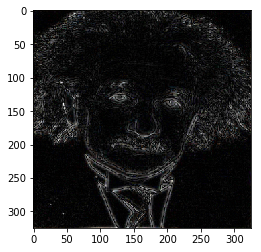

<Figure size 432x288 with 0 Axes>

In [4]:
img1r = (np.fft.ifft2(img1rFT))
img1g = (np.fft.ifft2(img1gFT))
img1b = (np.fft.ifft2(img1bFT))

img2r = abs(np.fft.ifft2(img2rFT))
img2g = abs(np.fft.ifft2(img2gFT))
img2b = abs(np.fft.ifft2(img2bFT))

#combining highpassed r g b channels of image1
img1=[]
for i in range(img1r.shape[0]):
    img1.append([])
    for j in range(img1r.shape[1]):
        img1[i].append([img1r[i][j],img1g[i][j],img1b[i][j]])
img1=np.array(img1)
#img3.reshape((265,225,3))
plt.imshow(np.absolute(img1) / np.max(np.absolute(img1)),cmap='gray')
#plt.imshow(img1)
plt.figure()


<Figure size 432x288 with 0 Axes>

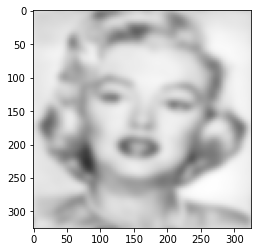

<Figure size 432x288 with 0 Axes>

In [5]:
#combining highpassed r g b channels of image2
img2=[]
for i in range(img2r.shape[0]):
    img2.append([])
    for j in range(img2r.shape[1]):
        img2[i].append([img2r[i][j],img2g[i][j],img2b[i][j]])
img2=np.array(img2)
#img3.reshape((265,225,3))
plt.imshow(np.absolute(img2) / np.max(np.absolute(img2)))
#plt.imshow(img2)
plt.figure()

<Figure size 432x288 with 0 Axes>

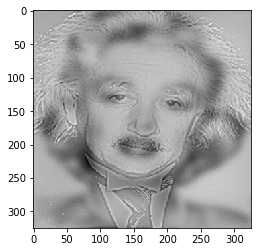

<Figure size 432x288 with 0 Axes>

In [6]:
#declaring empty r g b arrays for hybrid image
img3rFT = np.zeros(img1rFT.shape,dtype=complex)
img3gFT = np.zeros(img1gFT.shape,dtype=complex)
img3bFT = np.zeros(img1bFT.shape,dtype=complex)

#combining highpassed and low passed image
img3rFT = img1rFT + img2rFT
img3gFT = img1gFT + img2gFT
img3bFT = img1bFT + img2bFT

#applying inverse fourier transform
img3r = abs(np.fft.ifft2(img3rFT))
img3g = abs(np.fft.ifft2(img3gFT))
img3b = abs(np.fft.ifft2(img3bFT))

# combining r,g,b channels of image 3 (hybrid image)
img3=[]
for i in range(img3r.shape[0]):
    img3.append([])
    for j in range(img3r.shape[1]):
        img3[i].append([img3r[i][j],img3g[i][j],img3b[i][j]])
img3=np.array(img3)
#img3.reshape((265,225,3))
img3.shape

plt.imshow(np.absolute(img3) / np.max(np.absolute(img3)))
plt.figure()